In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

In [12]:
X[:,1]  #first array

array([-0.76613441,  0.42486577,  0.52993267, -0.59898403, -0.79693694,
       -0.8096356 ,  0.19969581, -0.4783401 ,  1.02466875, -0.08438964,
        0.67395748, -0.59912738,  0.09644282, -0.80193362, -0.53212261,
        0.56412698, -0.01060355, -0.2305685 ,  0.97514198, -0.70551635,
        0.43425039, -0.82399785, -0.25646566, -0.89499225,  0.84200403,
        1.04254495, -1.00243527, -0.53125463,  0.89017977,  0.21225071,
        1.08278594, -0.37654106, -0.9034931 , -0.17066743, -0.81040172,
        0.60465119,  0.65703697,  0.90097737, -0.92936284,  0.95917592,
       -0.24504194, -0.86167811,  0.70228309, -0.40967989, -0.27568326,
        0.74624748, -0.54107277,  0.0873317 ,  0.65407305,  1.07215079,
        0.13723108,  0.38336664,  0.75966649, -0.950856  ,  0.95085717,
       -0.11564026,  0.66809706,  0.59237278, -0.98385874, -0.78835856,
        0.47418292,  0.01022623,  0.69151246, -0.69847452,  0.00592813,
        0.6724898 , -0.56648943,  0.73361348,  0.83618951, -0.29

<Axes: >

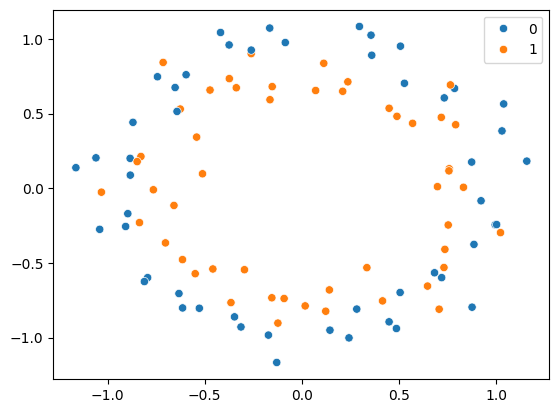

In [17]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


#circles data - lets see at what epoch it converges

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [20]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [24]:
history = model.fit(X_train, y_train, epochs = 3500, validation_data = [X_test, y_test], verbose = 0)

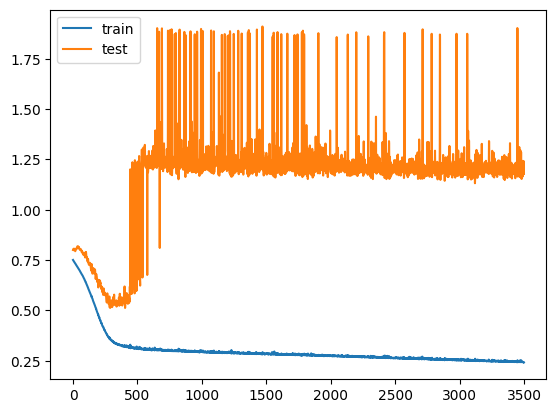

In [27]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

We can see train loss reducing but test has increased by a huge amount

Early Stopping


In [40]:
callbacks = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.000001,
                          patience = 20,
                          verbose = 1, mode = 'auto',
                          baseline = None,
                          restore_best_weights = False)

In [41]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [43]:
history = model.fit(X_train, y_train, validation_data = [X_test, y_test], epochs = 3500, callbacks = callbacks, verbose =1 )

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5383 - loss: 0.6952 - val_accuracy: 0.3500 - val_loss: 0.7143
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5289 - loss: 0.6963 - val_accuracy: 0.4000 - val_loss: 0.7118
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5680 - loss: 0.6908 - val_accuracy: 0.4000 - val_loss: 0.7121
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5008 - loss: 0.6913 - val_accuracy: 0.4000 - val_loss: 0.7118
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5672 - loss: 0.6910 - val_accuracy: 0.4000 - val_loss: 0.7119
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6500 - loss: 0.6877 - val_accuracy: 0.4000 - val_loss: 0.7126
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6094 - loss: 0.6882 - val_accuracy: 0.4500 - val_loss: 0.7142
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5914 - loss: 0.6888 - val_accuracy: 0.4000 - 

Early stopped at 24 epochs only

```
# This is formatted as code
```



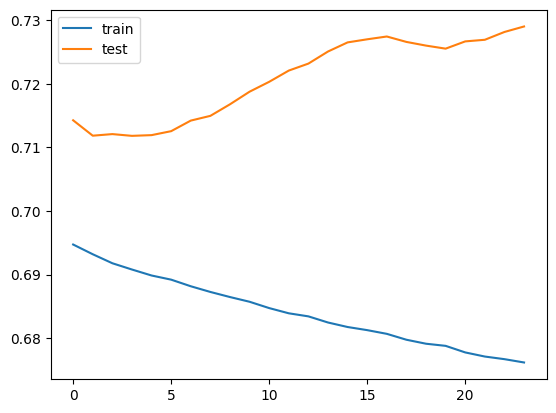

In [44]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Feature Scaling

In [54]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [55]:
df = df.iloc[:, 2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Diff scaling of Age and salary

In [57]:
X = df.drop('Purchased', axis = 1)
Y = df['Purchased']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


In [60]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
history = model.fit(X_train, Y_train, validation_data = [X_test, Y_test], epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5025 - loss: 86.8994 - val_accuracy: 0.3125 - val_loss: 55.1887
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4117 - loss: 86.2928 - val_accuracy: 0.6875 - val_loss: 18.0392
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5168 - loss: 41.4684 - val_accuracy: 0.6875 - val_loss: 35.9566
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5411 - loss: 68.1939 - val_accuracy: 0.3125 - val_loss: 82.3898
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4698 - loss: 68.4265 - val_accuracy: 0.6750 - val_loss: 5.1668
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4584 - loss: 85.5009 - val_accuracy: 0.3125 - val_loss: 160.4123
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4467 - loss: 148.0135 - val_accuracy: 0.3125 - val_loss: 314.0860
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4452 - loss: 187.1760 - val_a

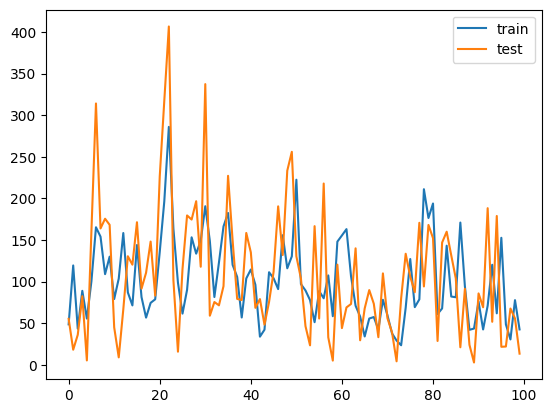

In [64]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Our validation and training loss and accuracy are changing a lot so we need to scale it first since Age is in 10s but salary is in 10000s which makes it hard for derivatives calculation - also weight adjustment would happen more because of Salary rather than age due to which they won't reach an optimum weight

We can use Standardscalar (when we don't know the range) and MinMaxScalar (when we know the min and max range)

In [74]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [67]:
X_train_scaled

array([[ 0.38695895,  0.10406548],
       [-1.31708045,  0.43526846],
       [ 0.10295238, -0.31746558],
       [-0.08638533, -0.2271375 ],
       [-0.55972961,  1.42887739],
       [ 1.80699177, -1.10030898],
       [-1.4117493 , -1.25085579],
       [ 0.67096551, -1.31107451],
       [ 0.29229009,  0.28472165],
       [ 0.19762124, -0.3776843 ],
       [ 0.38695895,  2.39237696],
       [-0.93840503,  0.43526846],
       [ 1.42831635,  0.37504974],
       [ 0.19762124, -0.28735622],
       [-0.27572304, -0.28735622],
       [ 2.09099834, -0.82932473],
       [ 0.67096551, -1.13041834],
       [-1.69575587,  0.37504974],
       [-0.27572304, -1.4014026 ],
       [-1.03307388, -0.46801239],
       [ 0.4816278 ,  1.27833058],
       [ 0.10295238, -0.82932473],
       [ 0.95497208,  1.94073654],
       [-0.27572304,  0.1642842 ],
       [ 1.42831635,  2.21172079],
       [ 1.04964093,  0.5557059 ],
       [ 1.52298521,  0.0137374 ],
       [-0.18105419,  1.45898675],
       [-0.65439846,

<Axes: >

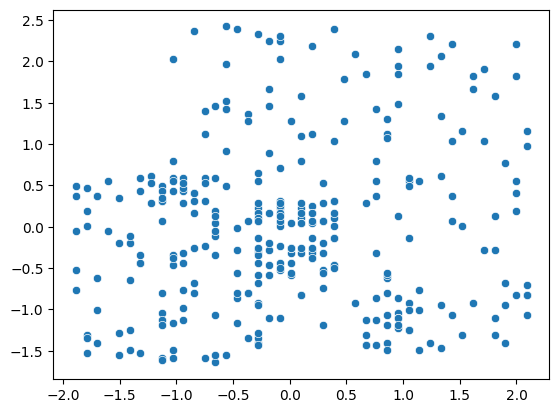

In [76]:
sns.scatterplot(x = X_train_scaled[:,0], y = X_train_scaled[:,1])

In [77]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
history = model.fit(X_train_scaled, Y_train, validation_data = [X_test_scaled, Y_test], epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5947 - loss: 0.6740 - val_accuracy: 0.7750 - val_loss: 0.6047
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8040 - loss: 0.6021 - val_accuracy: 0.7875 - val_loss: 0.5362
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.5435 - val_accuracy: 0.8000 - val_loss: 0.4827
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8520 - loss: 0.4887 - val_accuracy: 0.8000 - val_loss: 0.4407
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8642 - loss: 0.4326 - val_accuracy: 0.8125 - val_loss: 0.4061
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8678 - loss: 0.3999 - val_accuracy: 0.8125 - val_loss: 0.3787
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3828 - val_accuracy: 0.8125 - val_loss: 0.3552
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8859 - loss: 0.3651 - val_accuracy: 0.8500 -

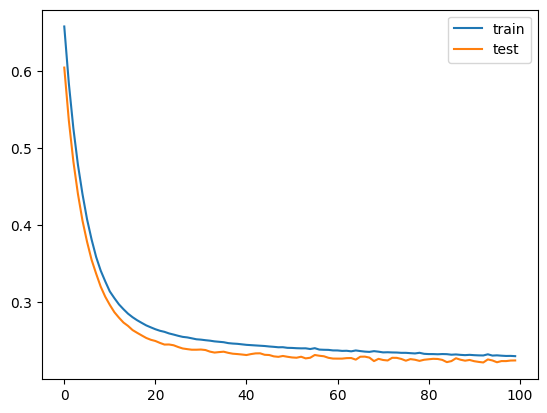

In [80]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

We can now see the reduction is consistent across epochs and not zigzag because now Gradient descent can converge faster (both X and Y are on same scale)

Drop out Layers


In [81]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [82]:
X_train = np.linspace(-1, 1, 20)

In [93]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [94]:
y_train.shape

(20,)

In [95]:
X_test = np.linspace(-1, 1, 20)

In [96]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

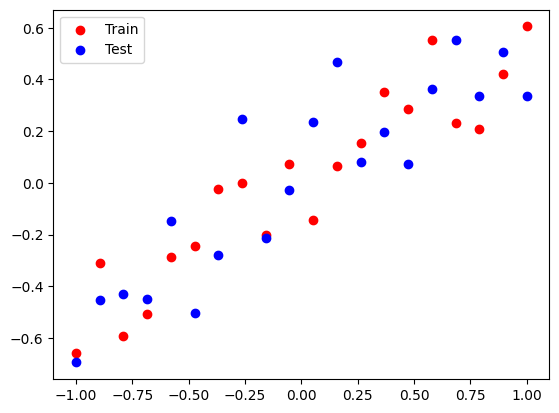

In [97]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [98]:
X_train.shape

(20,)

In [101]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500,
                    validation_data = (X_test, y_test),
                    verbose=False)

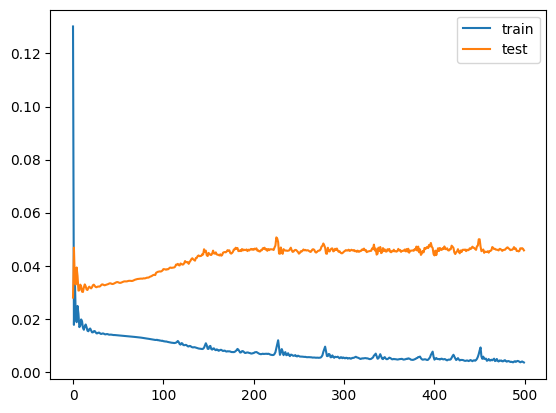

In [102]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [105]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.003787929890677333, Test: 0.04577353969216347


In [108]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


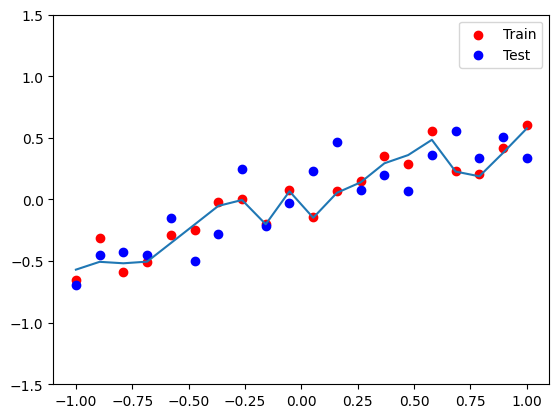

In [113]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

This is result of overfitting  where predictions are overfitting to train and trying to understand deep patterns

Dropout model

In [122]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim = 1, activation = 'relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation = 'linear'))

optimiser = Adam(learning_rate = 0.2)

model_2.compile(optimizer = optimiser, loss = 'mse', metrics = ['mse'])
history = model_2.fit(X_train, y_train, validation_data = [X_test, y_test], epochs = 500, verbose = False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


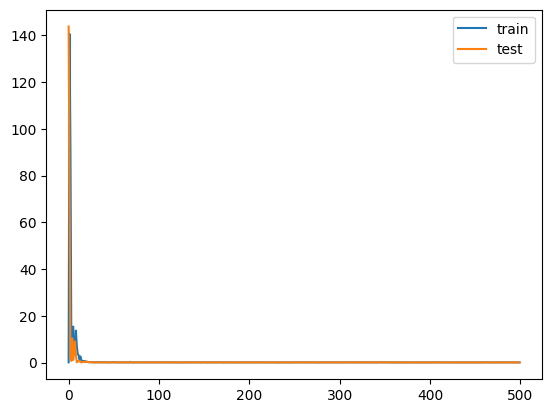

In [123]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [118]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.016728755086660385, Test: 0.04311400651931763


In [124]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


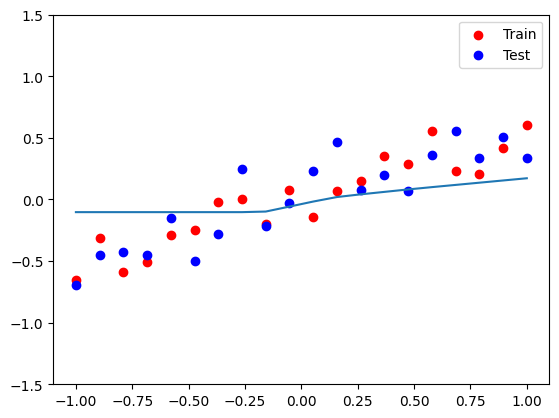

In [125]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

With p = 0.5 - decision boundary is more generalised than with p =0.25, so if overifttting is happening - Increase the p and if underfitting is happening, decrease the p

Regularisation

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [127]:
X, y = make_moons(100, noise=0.25,random_state=2)

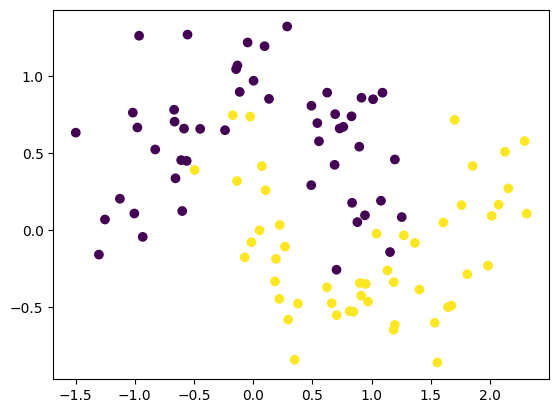

In [129]:
plt.scatter(x= X[:,0], y = X[:,1], c = y)

In [130]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

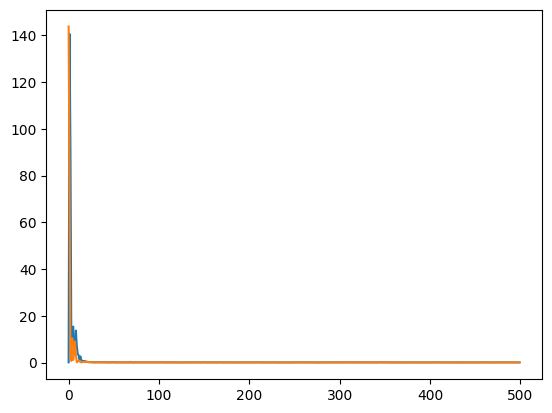

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

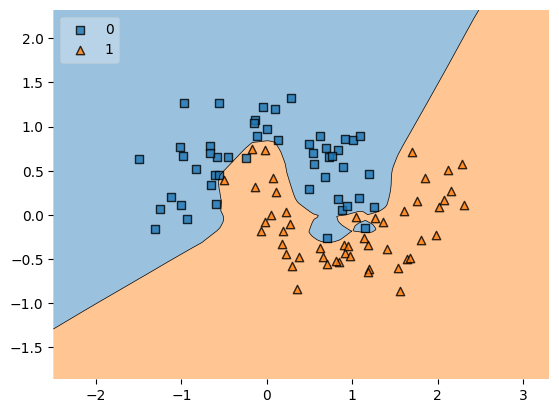

In [133]:
plot_decision_regions(X, y.astype('int'), clf = model1, legend = 2)

It is overfitting - creating decision boundary which us fitting to train data very well

In [135]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer = tensorflow.keras.regularizers.l2(0.3)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.3)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


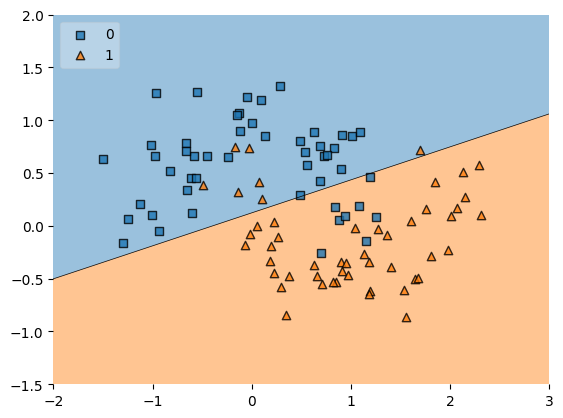

In [137]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

This is more generalised decision boundary

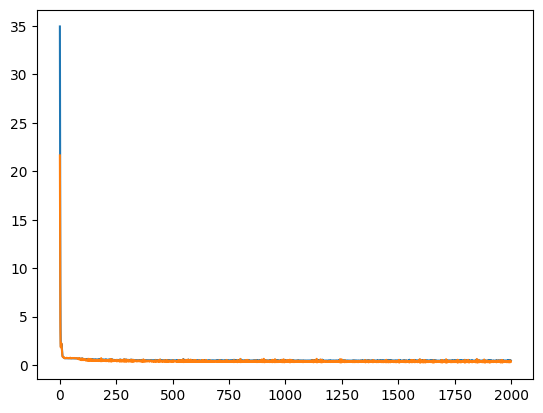

In [138]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [144]:
model1_getweights_ = model1.get_weights()[0].reshape(1,256)
model2_getweights_ = model2.get_weights()[0].reshape(1,256)

In [147]:
model2.get_weights()[0]

array([[ 9.76362530e-37,  3.18677781e-37, -1.04074011e-37,
         1.43202712e-36,  1.73666089e-36,  1.90283722e-36,
         4.28803429e-37, -2.09023329e-37, -1.84274237e-36,
         7.24619732e-38,  9.16809184e-37, -1.16299306e-36,
        -1.13400264e-36, -1.61085487e-36,  1.42936219e-36,
        -6.95049419e-38, -1.40512327e-36,  1.15946081e-36,
        -2.43293036e-37,  1.81471891e-36, -1.73747378e-37,
         1.81763648e-36, -1.52596120e-36, -1.18165092e-36,
         6.51733557e-37, -3.20580319e-37, -9.96742297e-37,
        -3.97485910e-37, -2.07860462e-36, -3.74816174e-37,
        -5.55118311e-37, -2.12662741e-36, -1.49891601e-36,
        -2.09718409e-36,  6.83476353e-37, -1.44038953e-37,
        -1.38333243e-36, -5.28812463e-37, -1.18492184e-37,
         9.84712206e-37, -1.85972619e-37, -1.24972039e-36,
        -2.04210288e-36, -7.10482446e-37,  6.00390699e-37,
        -1.28952247e-36, -8.60881954e-02, -6.01951903e-37,
        -1.84306487e-36, -2.06787744e-36, -5.68488536e-3

<ipython-input-145-4324f766f74e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_getweights_)


<Axes: ylabel='Density'>

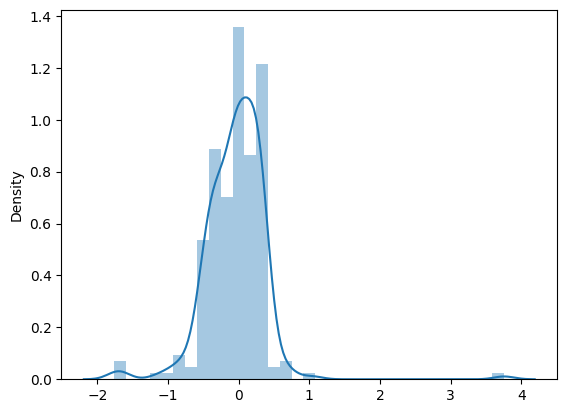

In [145]:
sns.distplot(model1_getweights_)

Weights of 1st model is centered around -2 to 1

<ipython-input-146-4c29a70736db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_getweights_)


<Axes: ylabel='Density'>

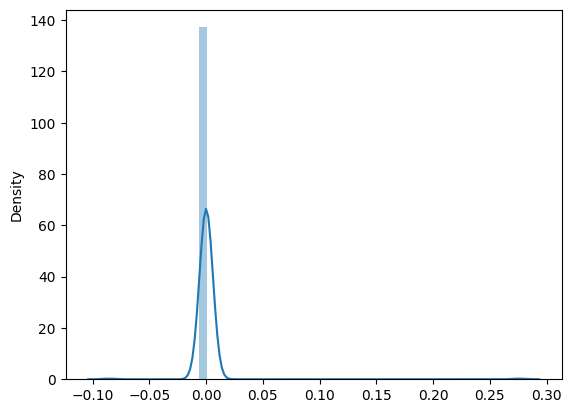

In [146]:
sns.distplot(model2_getweights_)

Weights of 1st model is centered around 0 - weights decay

Activation Functions :

1. Sigmoid
2. TanH
3. ReLU
4. Relu Variants -- 1. Leaky ReLU 2. Parametric ReLU 3. Exponential ReLU (EReLU) 4. Scaled Exponential ReLU (SeLU)

Weight Initialisation

1. What Not to do -


*   Case 1 - When setting weights to 0 - in case of ReLU/TanH and Sigmoid
*   Case 2 - When setting weights to constant non-zero values - in case of ReLU/TanH and Sigmoid
*   Case 3 - When setting random values - Small - In sigmoid/TanH and ReLU
*   Case 3 - When setting random values - Large -  In sigmoid/TanH and ReLU


2. What to do :


*   Xavier/Glorat
*   He







Case 1. Setting weight to 0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
X, y = make_moons(100, noise=0.25,random_state=2)

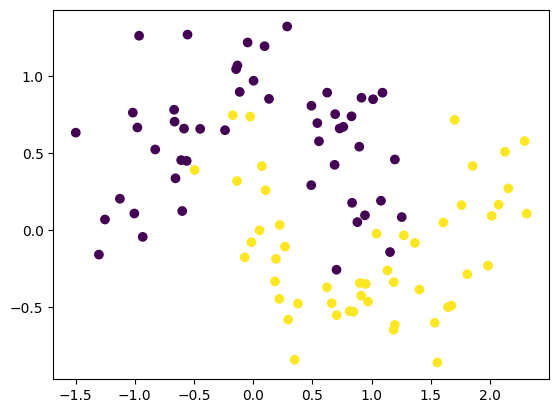

In [79]:
plt.scatter(X[:,0], X[:,1], c = y)

In [103]:
model1 = Sequential()

model1.add(Dense(2,input_dim=2, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()


#in case of relu/TanH - when weights are initialised to 0 - it will be 0 only
#in case of sigmoid -symmeterical weights - non linearity would not be captured

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
model1.get_weights()[0].shape

#this is 2 nodes - each giving 128 weights in 1st hidden layer

(2, 2)

In [105]:
model1.get_weights()[0]

array([[-0.8930614 ,  0.9809648 ],
       [-0.86138296, -1.073092  ]], dtype=float32)

In [122]:
initialize_weights = model1.get_weights()

In [107]:
initialize_weights

#initilaised weights automtiaccally
#check weights are something and bias in both layers are 0

[array([[-0.8930614 ,  0.9809648 ],
        [-0.86138296, -1.073092  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6594586],
        [-1.2330189]], dtype=float32),
 array([0.], dtype=float32)]

In [86]:
#setting them to 0

initialize_weights[0]  #weights of first layer

#first layer


array([[-0.71351665,  0.6740842 ],
       [ 0.82789624,  0.7433864 ]], dtype=float32)

In [87]:
initialize_weights[1] #bias of first layer

array([0., 0.], dtype=float32)

In [88]:
initialize_weights[2] #weights of 2nd layer

array([[-1.4104443 ],
       [ 0.34749103]], dtype=float32)

In [89]:
initialize_weights[3] #bias of second  layer

array([0.], dtype=float32)

In [91]:
initialize_weights[0] = np.ones(initialize_weights[0].shape)*0.5
initialize_weights[1] =  np.ones(initialize_weights[1].shape) *0.5
initialize_weights[2] =  np.ones(initialize_weights[2].shape) *0.5
initialize_weights[3] =  np.ones(initialize_weights[3].shape) *0.5   #added a non-zero constant

In [92]:
np.zeros(4)

array([0., 0., 0., 0.])

In [68]:
np.zeros(initialize_weights[0].shape)

array([[0., 0.],
       [0., 0.]])

In [69]:
np.zeros(initialize_weights[3].shape)

array([0.])

In [93]:
initialize_weights

#all are 0

[array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([0.5, 0.5]),
 array([[0.5],
        [0.5]]),
 array([0.5])]

In [94]:
model1.set_weights(initialize_weights)

In [95]:
model1.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [96]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [97]:
model1.fit(X, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5578 - loss: 0.8477 - val_accuracy: 0.3500 - val_loss: 1.0134
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5422 - loss: 0.8726 - val_accuracy: 0.3500 - val_loss: 1.0086
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5383 - loss: 0.8536 - val_accuracy: 0.3500 - val_loss: 1.0040
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5813 - loss: 0.8061 - val_accuracy: 0.3500 - val_loss: 0.9995
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5578 - loss: 0.8261 - val_accuracy: 0.3500 - val_loss: 0.9951
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4914 - loss: 0.9166 - val_accuracy: 0.3500 - val_loss: 0.9908
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5422 - loss: 0.8413 - val_accuracy: 0.3500 - val_loss: 0.9867
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5305 - loss: 0.8533 - val_accuracy: 0.3500 - val_loss: 0.9826


In [98]:
#checking weights after fitting
model1.get_weights()

[array([[0.5012353 , 0.5012353 ],
        [0.47121975, 0.47121975]], dtype=float32),
 array([0.47175747, 0.47175747], dtype=float32),
 array([[0.471395],
        [0.471395]], dtype=float32),
 array([0.47133127], dtype=float32)]

Trained weights even after fitting are 0 - because neurons are dead - and activation function of relu or TanH will just give not converge

Weights are not 0 after fitting in case of sigmoid but weights of layer 1 coming from Node 1 - both similar w11 and w12 similarly for w21 and w22

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

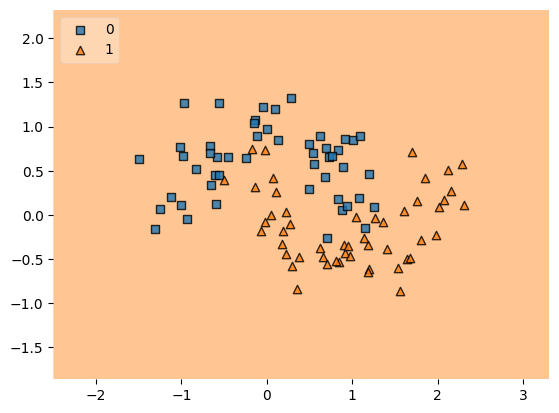

In [76]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

The decision boundary is not able to classify them properly - only 50% accuracy

In case of sigmoid when weights is set to 0 - it will not capture non-linearity

Same problem occurs when we set a constant Non-zero value - Non symettery and not able to capture No-linearity

In [100]:
np.random.randn(2) * 0.01  #normally distributed values

#normally distributed small values

array([ 0.00228919, -0.00384202])

In [108]:
initialize_weights

[array([[-0.8930614 ,  0.9809648 ],
        [-0.86138296, -1.073092  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6594586],
        [-1.2330189]], dtype=float32),
 array([0.], dtype=float32)]

In [154]:
initialize_weights[0] = np.random.randn(model1.get_weights()[0].shape[0], model1.get_weights()[0].shape[1])*0.01  #weight of first layer
initialize_weights[1] =  np.zeros(model1.get_weights()[1].shape[0])  #bias of first layer

initialize_weights[2] =  np.random.randn(model1.get_weights()[2].shape[0], model1.get_weights()[2].shape[1]) *0.01  #weight of second layer
initialize_weights[3] =  np.random.randn(model1.get_weights()[3].shape[0]) *0.01   #bias of 2nd layer
#added a random (small) number

In [111]:
initialize_weights[0].shape

(2, 2)

In [155]:
initialize_weights

[array([[-0.0118419 , -0.00546865],
        [-0.01941457, -0.01089128]]),
 array([0., 0.]),
 array([[-0.00455539],
        [-0.00663393]]),
 array([-0.00031767])]

In [143]:
model1.get_weights()[0].shape[0]

2

In [144]:
model1.get_weights()[0].shape[1]

2

In [145]:
model1.get_weights()[1].shape[0]

2

In [146]:
model1.get_weights()[1].shape[1]

IndexError: tuple index out of range

In [134]:
model1.get_weights()

[array([[-0.8930614 ,  0.9809648 ],
        [-0.86138296, -1.073092  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6594586],
        [-1.2330189]], dtype=float32),
 array([0.], dtype=float32)]

In [147]:
model1.get_weights()[1]

array([0., 0.], dtype=float32)

In [149]:
model1.get_weights()[3]

array([0.], dtype=float32)

In [150]:
model1.get_weights()[2].shape[0]

2

In [151]:
model1.get_weights()[2].shape[1]

1

In [156]:
model1.set_weights(initialize_weights)

In [157]:
model1.get_weights()

[array([[-0.0118419 , -0.00546865],
        [-0.01941457, -0.01089128]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00455539],
        [-0.00663393]], dtype=float32),
 array([-0.00031767], dtype=float32)]

In [158]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [162]:
model1.fit(X, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5227 - loss: 0.6924 - val_accuracy: 0.3500 - val_loss: 0.6949
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5422 - loss: 0.6919 - val_accuracy: 0.3500 - val_loss: 0.6948
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5383 - loss: 0.6919 - val_accuracy: 0.3500 - val_loss: 0.6948
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5539 - loss: 0.6914 - val_accuracy: 0.3500 - val_loss: 0.6946
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5148 - loss: 0.6920 - val_accuracy: 0.3500 - val_loss: 0.6944
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5383 - loss: 0.6913 - val_accuracy: 0.3500 - val_loss: 0.6942
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5617 - loss: 0.6907 - val_accuracy: 0.3500 - val_loss: 0.6940
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5305 - loss: 0.6909 - val_accuracy: 0.3500 - val_loss

In [163]:
#checking weights after fitting
model1.get_weights()

[array([[-0.24989845, -0.24904417],
        [ 0.44729897,  0.4512082 ]], dtype=float32),
 array([0.36966705, 0.36644363], dtype=float32),
 array([[-0.46082765],
        [-0.46056837]], dtype=float32),
 array([0.17664336], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

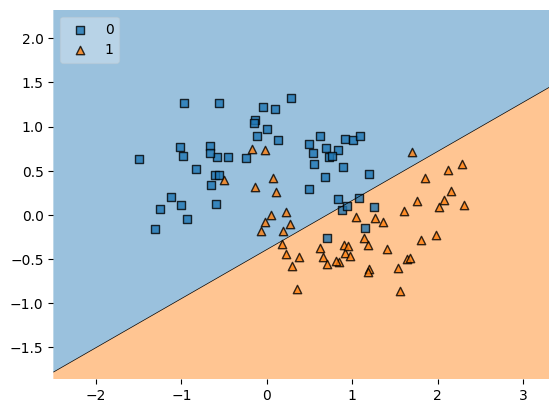

In [164]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

Even in case of ReLU when we intialised it with Random small numbers - even with 100 epochs - it didn't capture non-linearity properly

Small random weights - works in case of ReLU but leads to slow convergence
but in case of TanH and Sigmoid - it leads to Vanishing Gradient problem because of how small the weights are (X are scaled and weights are so small so in that case of new weights wouldn't be chaged after sigmoid activayion)

Case 2 - What should be done


*   Xavir/Glorat - use in case of Sigmoid/Tanh - hidden layers
*   He  - use in case of reLU - hidden layers



In [5]:
model1 = Sequential()

model1.add(Dense(2,input_dim=2, activation="relu", kernel_initializer= 'he_normal'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()


#in case of relu/TanH - when weights are initialised to 0 - it will be 0 only
#in case of sigmoid -symmeterical weights - non linearity would not be captured

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model1.fit(X, y, validation_split = 0.2, epochs = 100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4727 - loss: 0.7064 - val_accuracy: 0.7500 - val_loss: 0.5932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7000 - loss: 0.7058 - val_accuracy: 0.7500 - val_loss: 0.5907
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7234 - loss: 0.6865 - val_accuracy: 0.8000 - val_loss: 0.5882
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7211 - loss: 0.6647 - val_accuracy: 0.8000 - val_loss: 0.5856
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7172 - loss: 0.6791 - val_accuracy: 0.8000 - val_loss: 0.5833
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6742 - loss: 0.6722 - val_accuracy: 0.8000 - val_loss: 0.5808
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7367 - loss: 0.6660 - val_accuracy: 0.8000 - val_loss: 0.5785
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7352 - loss: 0.6711 - val_accuracy: 0.8000 - val_loss:

In [9]:
model1.get_weights()

[array([[-0.7770018, -0.5142457],
        [ 1.3209695,  1.1167957]], dtype=float32),
 array([ 0.20130453, -0.18734889], dtype=float32),
 array([[-1.5695051 ],
        [ 0.83644456]], dtype=float32),
 array([0.22518443], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


<Axes: >

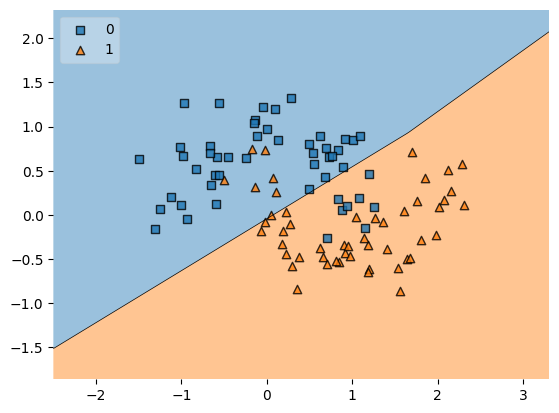

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

Using He Normal intialiser - actually could capture non-linearity in 100 epochs

If you have activation functions of TanH or sigmoid in hidden layers - use gloret_uniform/normal for weight initialisation

**Batch Normalisation**

In [8]:
import pandas as pd

# Read the CSV file without headers and provide column names
df = pd.read_csv('3.concertriccir2.csv', header=None, names=['X', 'Y', 'Class'])

# Display the first few rows
df.head()


,X,Y,Class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


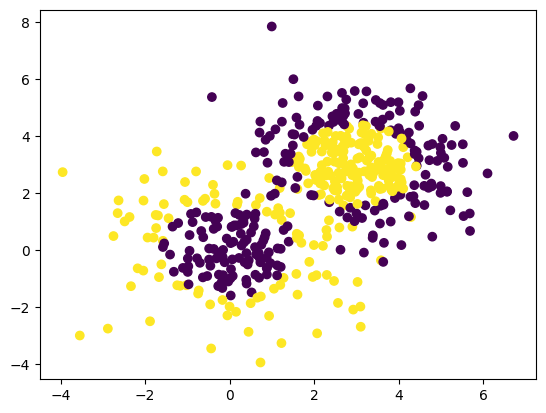

In [11]:
plt.scatter(df['X'], df['Y'], c = df['Class'])  #this is concetrix data

In [28]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [29]:
Y

,Class
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
495,1.0
496,1.0
497,0.0
498,0.0


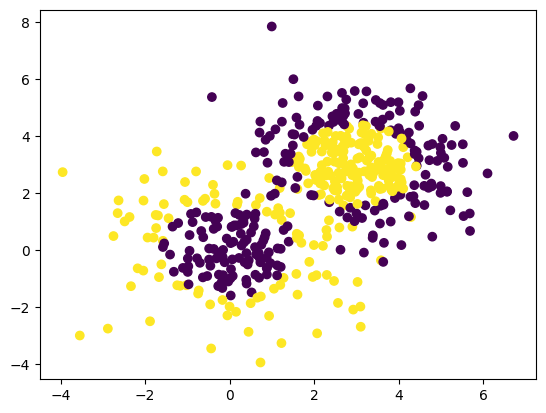

In [30]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = Y)  #this is concetrix data

In [31]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [32]:
model = Sequential()

model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
history = model.fit(X, Y, epochs = 200, validation_split = 0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5475 - loss: 0.6924 - val_accuracy: 0.4300 - val_loss: 0.7183
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5360 - loss: 0.6903 - val_accuracy: 0.5700 - val_loss: 0.7166
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5886 - loss: 0.6938 - val_accuracy: 0.5800 - val_loss: 0.7156
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5502 - loss: 0.6969 - val_accuracy: 0.5800 - val_loss: 0.7145
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5647 - loss: 0.6901 - val_accuracy: 0.5900 - val_loss: 0.7143
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5875 - loss: 0.6896 - val_accuracy: 0.5900 - val_loss: 0.7133
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5895 - loss: 0.6890 - val_accuracy: 0.5900 - val_loss: 0.7122
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5656 - loss: 0.6940 - val_accuracy: 0.

In [34]:
#with batch normalisation layer
#each neuron in that layer will have y and gamma and mean of activations of that batch + std dev of deviations of that layer

model1 = Sequential()

model1.add(Dense(3, activation = 'relu', input_dim = 2))
model1.add(BatchNormalization())
model1.add(Dense(2, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

Non - Trainable parameters - Mean and std dev from 1st layer - 12 - 6 + 4(2nd layer)  = 10

In [38]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
history1 = model1.fit(X, Y, epochs = 200, validation_split = 0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5374 - loss: 0.8288 - val_accuracy: 0.4300 - val_loss: 0.6962
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5746 - loss: 0.8155 - val_accuracy: 0.4300 - val_loss: 0.6994
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5485 - loss: 0.8162 - val_accuracy: 0.4300 - val_loss: 0.7025
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5860 - loss: 0.8106 - val_accuracy: 0.4300 - val_loss: 0.7058
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5148 - loss: 0.8205 - val_accuracy: 0.4300 - val_loss: 0.7088
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5611 - loss: 0.7804 - val_accuracy: 0.4300 - val_loss: 0.7116
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5677 - loss: 0.7791 - val_accuracy: 0.4300 - val_loss: 0.7143
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5817 - loss: 0.7783 - val_accuracy: 0.4400 - 

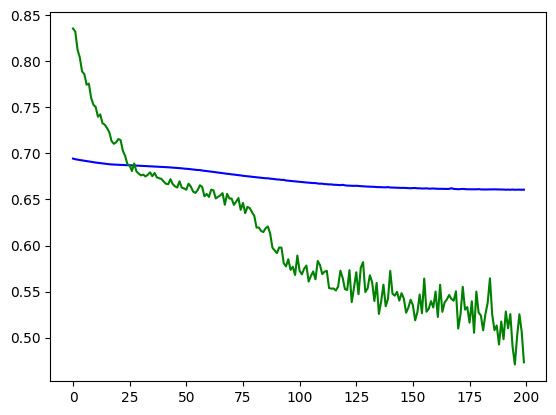

In [43]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history1.history['loss'], color = 'green')

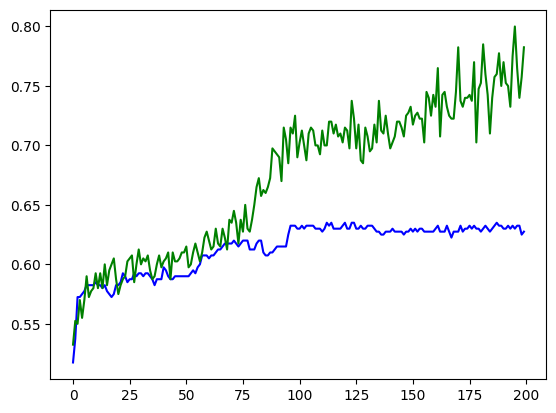

In [44]:
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history1.history['accuracy'], color = 'green')

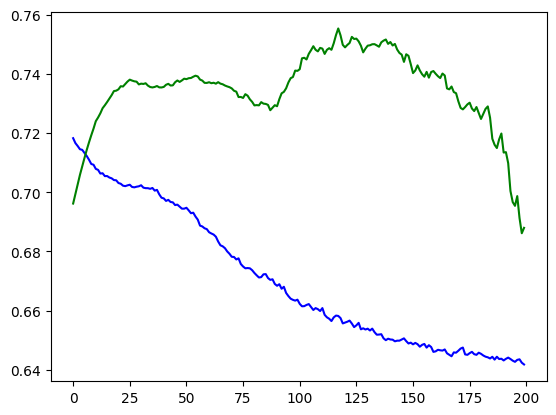

In [57]:
plt.plot(history.history['val_loss'], color = 'blue')
plt.plot(history1.history['val_loss'], color = 'green')

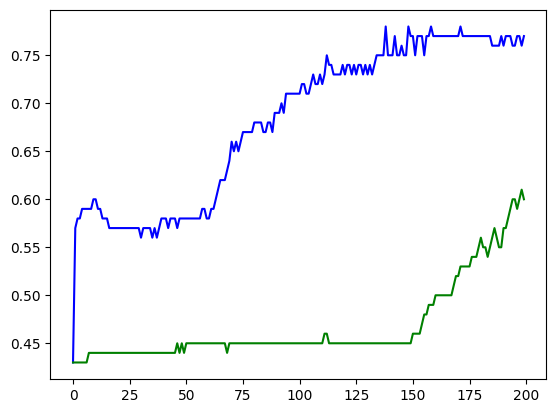

In [58]:
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.plot(history1.history['val_accuracy'], color = 'green')

*With batch normalisation  we can stop training at 75th epoch only - since te jump is lowest there rather than without it (reduction in val loss) is gradual there*

With batch normalisation - we can see most of the accuract was known at 75 epochs only while without it accuracy is pretty constant and we can't say for sure at which epoch we can stop the training

Loss and accuracy is pretty constant - training is slow without batch normalisation

**Optimizers**

Why not used Gradient descent ?

Gradient descent is an optimiser that we used to find optimmu values of weights and biases to reach Global minima (where loss is minimum) - old weights get updated where wnew = wold - lr* derivative of loss wrt derivative of wold but it has some challenges : 1. Deciding value of lr (it can't be too high or too low) 2. Learning rate scheduler (scheduling a value for lr - pre-training can be complex) 3. DIff learning rate for diff weights can't be selected (since diff weights mightreach the minima at diff speed and that is not possible in GD) 4. Local minima mein we can get strucked - since stochastic still gets updated for each point but batch and mini-batch might get struck at local minima 5. saddle point (where gradient is 0 and wold = wnew )

In [71]:
 import pandas as pd

# Sample data
data = [10, 12, 14, 16, 90,14,2,91]
df = pd.DataFrame(data, columns=["Value"])

# Calculate the EWMA with alpha = 0.9
df['EWMA'] = df['Value'].ewm(alpha=0.9, adjust=False).mean()

#point alpha = 0.9 means we are taking last 10 days avg

In [70]:
df

,Value,EWMA
0,10,10.000000
1,12,11.800000
2,14,13.780000
3,16,15.778000
4,90,82.577800
5,14,20.857780
6,2,3.885778
7,91,82.288578


EWMA -> Vt = alpha * V(t-1) + (1-alpha)* Xt


for each data - old values are being penalised by multiplication with alpha and so on..


**All about Optimizers in Excel workbook**

**Hyperparameter tuning in Keras**

In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('diabetes (2).csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.corr()['Outcome']

#glucose is most related to diabetic outcome while blood pressure and skin thickess are not

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [18]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [19]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

print(X_train_scaled, X_test_scaled)

(614, 8) (154, 8)
[[-0.53608461 -0.29938316  0.4729814  ...  0.93226623 -0.87625095
  -0.77760189]
 [-0.83750947  0.67504555  0.77607123 ...  1.30084266  1.78121836
  -0.94655008]
 [-0.83750947 -3.81989982  0.27092151 ... -0.50518181 -0.5105171
  -1.03102417]
 ...
 [ 0.9710397   1.77520701  0.77607123 ...  0.99369564 -0.41613417
   0.65845766]
 [-0.83750947 -0.4251159   0.97813112 ... -0.57889709 -0.21262099
  -0.77760189]
 [ 0.06676512  0.83221148 -0.43628811 ... -0.11203363 -0.94998761
  -0.35523144]] [[ 0.06676512 -1.14807914 -0.53731806 ... -0.49289593 -0.48987084
  -0.43970553]
 [ 0.66961484  2.30957114  0.06886162 ... -0.11203363 -0.42498257
  -0.18628326]
 [ 0.66961484  1.02081058  0.27092151 ... -0.30860772  1.0821948
   0.48950947]
 ...
 [ 0.36818998 -1.05377959  0.4729814  ... -0.51746769 -0.63144523
   0.32056129]
 [-0.83750947 -1.11664596 -0.13319827 ...  1.16569797  1.31225319
  -0.35523144]
 [-0.53608461 -0.99091322 -0.03216833 ...  0.78483567  0.09117406
  -0.52417962]]


In [44]:
model = Sequential()

model.add(Dense(32, input_dim = 8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(X_train_scaled, Y_train, epochs = 100, batch_size = 32,  validation_data = [X_test_scaled, Y_test])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6528 - loss: 0.6594 - val_accuracy: 0.6818 - val_loss: 0.6352
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.6127 - val_accuracy: 0.6948 - val_loss: 0.5945
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.5846 - val_accuracy: 0.7403 - val_loss: 0.5624
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7548 - loss: 0.5624 - val_accuracy: 0.7597 - val_loss: 0.5389
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.5331 - val_accuracy: 0.7597 - val_loss: 0.5196
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7623 - loss: 0.5271 - val_accuracy: 0.7727 - val_loss: 0.5063
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5173 - val_accuracy: 0.7597 - val_loss: 0.4952
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7648 - loss: 0.4947 - val_accuracy: 0.7727 - val_loss: 0.

Validation accuracy is terrible  - 0.461% only - we need to hypertune our model


*  Hypertune the optimizer - which one to choose - Adam, RMSProp, Adagrad, etc.
*  Hypertune - No of Neuron in each layer
*  Hypertune - No of Hidden layers





1. Which optimiser

In [6]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [7]:
import kerastuner as kt

<ipython-input-7-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [70]:
#first build a model
#then a tuner object where you put this model in
#then call the tuner and fit data
#get the best model and start the initial_epochs after the epochs that have been completed

def build_model(hp):

  model = Sequential()
  model.add(Dense(32, input_dim = 8, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  optimizer = hp.Choice('Optimizer', values = ['adam', 'adagrad', 'sgd', 'adadelta'])
  model.compile(optimizer = optimizer,  loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [71]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

Reloading Tuner from ./untitled_project/tuner0.json


In [72]:
tuner.search(X_train_scaled, Y_train, epochs = 5, validation_data = [X_test_scaled, Y_test])

In [73]:
tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'SGD'}

In [74]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(X_train_scaled, Y_train, epochs = 100, batch_size = 32, validation_data = [X_test_scaled, Y_test], initial_epoch = 6)

#start from 6th epoch now

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6962 - loss: 0.5947 - val_accuracy: 0.7273 - val_loss: 0.5724
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5790 - val_accuracy: 0.7273 - val_loss: 0.5633
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.5774 - val_accuracy: 0.7143 - val_loss: 0.5546
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.5593 - val_accuracy: 0.7078 - val_loss: 0.5468
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7251 - loss: 0.5607 - val_accuracy: 0.7403 - val_loss: 0.5391
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5473 - val_accuracy: 0.7532 - val_loss: 0.5324
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.5280 - val_accuracy: 0.7597 - val_loss: 0.5269
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.5320 - val_accuracy: 0.76

With this also - accuracy has actually decreased from 0.461 to 0.4626 - Not much but we will keep on hypertuning with No of neurons now

2. Checking number of Neurons

In [8]:
import kerastuner as kt

In [21]:
def build_model_2(hp):

  model = Sequential()

  units = hp.Int('units', min_value = 8, max_value = 128, step = 8)
  model.add(Dense(units = units, input_dim = 8, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [22]:
tuner = kt.RandomSearch(build_model_2, objective = 'val_accuracy', max_trials = 5,
                        directory = 'mydir')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
tuner.search(X_train_scaled, Y_train, epochs = 5, validation_data = [X_test_scaled, Y_test])

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.701298713684082

Best val_accuracy So Far: 0.7077922224998474
Total elapsed time: 00h 00m 11s


In [24]:
tuner.get_best_hyperparameters()[0].values

{'units': 80}

In [25]:
#80 best units

In [26]:
model = tuner.get_best_models(num_models = 1)[0]

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train_scaled, Y_train, epochs = 100, batch_size = 32, validation_data = [X_test_scaled, Y_test], initial_epoch = 6)

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7535 - loss: 0.5862 - val_accuracy: 0.7078 - val_loss: 0.5964
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7667 - loss: 0.5661 - val_accuracy: 0.7078 - val_loss: 0.5882
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7570 - loss: 0.5650 - val_accuracy: 0.7143 - val_loss: 0.5806
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7861 - loss: 0.5461 - val_accuracy: 0.7143 - val_loss: 0.5744
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7532 - loss: 0.5453 - val_accuracy: 0.7143 - val_loss: 0.5693
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7779 - loss: 0.5316 - val_accuracy: 0.7078 - val_loss: 0.5650
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7810 - loss: 0.5205 - val_accuracy: 0.7078 - val_loss: 0.5608
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7679 - loss: 0.5192 - val_accuracy: 0.

Accuarcy has increased to 0.75 now after hyperparamter tuning for number of neurons

Check number of Hidden layers

In [40]:
def build_model(hp):

  model = Sequential()

#input layer
  model.add(Dense(72, activation = 'relu', input_dim = 8))

#number of hidden layers after this?

  for i in range(hp.Int('num_layer', min_value = 1, max_value = 10)):

    model.add(Dense(72, activation = 'relu'))  #starting with 1 - add this until 10 tims

#come out of loop for hidden layer -

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [41]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

Reloading Tuner from ./untitled_project/tuner0.json


In [42]:
tuner.search(X_train_scaled, Y_train, epochs = 10, validation_data = [X_test_scaled, Y_test])

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 46s


In [43]:
tuner.get_best_hyperparameters()[0].values

#showing number of hidden layers should be 10

{'num_layer': 10}

In [45]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 72)                  │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 72)                  │           5,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,281 (208.13 KB)

 Trainable params: 53,281 (208.13 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(X_train_scaled, Y_train, epochs = 100, batch_size = 32, validation_data = [X_test_scaled, Y_test], initial_epoch = 6)

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7930 - loss: 0.4858 - val_accuracy: 0.7468 - val_loss: 0.6071
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7887 - loss: 0.4391 - val_accuracy: 0.7013 - val_loss: 0.5682
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7719 - loss: 0.4462 - val_accuracy: 0.7338 - val_loss: 0.5922
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8163 - loss: 0.4114 - val_accuracy: 0.7468 - val_loss: 0.5929
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8139 - loss: 0.3751 - val_accuracy: 0.7273 - val_loss: 0.5361
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8230 - loss: 0.3863 - val_accuracy: 0.7273 - val_loss: 0.5852
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8236 - loss: 0.3615 - val_accuracy: 0.7403 - val_loss: 0.6135
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8111 - loss: 0.3951 - val_accuracy: 0

Model increased accuracy to 0.68

In [72]:
def build_model_3(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):

    if counter == 0:  #first layer - should have inputs

      model.add(Dense( hp.Int('units' + str(i), min_value = 8, max_value = 128, step = 8),
                      activation = hp.Choice('activation' + str(i), values = ['relu', 'sigmoid', 'tanh']),
                      input_dim = 8
                      ))

      model.add(Dropout(rate = hp.Choice('dropout'+ str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    else : #after that no need of input_dim #take it from previous layers

      model.add(Dense( hp.Int('units' + str(i), min_value = 8, max_value = 128, step = 8),
                activation = hp.Choice('activation' + str(i), values = ['relu', 'sigmoid', 'tanh']),
                ))

      model.add(Dropout(rate = hp.Choice('dropout'+ str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

      counter +=1

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = hp.Choice('Optimizer', values = ['adam', 'adagrad', 'rmsprop', 'adadelta']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [74]:
tuner = kt.RandomSearch(build_model_3, objective = 'val_accuracy', max_trials = 5,
                        directory = 'salmankhan1')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
tuner.search(X_train_scaled, Y_train, epochs = 10, validation_data = [X_test_scaled, Y_test])

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.37662336230278015

Best val_accuracy So Far: 0.649350643157959
Total elapsed time: 00h 00m 34s


In [78]:
tuner.get_best_hyperparameters()[0].values


{'num_layers': 4,
 'units0': 64,
 'activation0': 'sigmoid',
 'dropout0': 0.2,
 'Optimizer': 'adagrad',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1}

In [79]:
model = tuner.get_best_models(num_models = 1)[0]

In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,249 (4.88 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(X_train_scaled, Y_train, epochs = 100, validation_data = [X_test_scaled, Y_test], initial_epoch = 11)

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6275 - loss: 0.6888 - val_accuracy: 0.6299 - val_loss: 0.6884
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 0.6952 - val_accuracy: 0.6364 - val_loss: 0.6873
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5730 - loss: 0.6917 - val_accuracy: 0.6429 - val_loss: 0.6864
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5532 - loss: 0.6909 - val_accuracy: 0.6429 - val_loss: 0.6856
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6180 - loss: 0.6862 - val_accuracy: 0.6429 - val_loss: 0.6850
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 0.6863 - val_accuracy: 0.6429 - val_loss: 0.6843
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6009 - loss: 0.6865 - val_accuracy: 0.6429 - val_loss: 0.6838
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 0.6880 - val_accuracy: 0

**Accuarcy has increased to 0.64 after all hyperparameter tuning** (Also added dropout layer to avoid overfitting)